In [9]:
# Para hacer un ejemplo de datos faltantes vamos a usar la base de datos de arbolado
import pandas as pd
import numpy as np
import re

arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles.head()

C:\Users\Ionatan\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000,1120,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300,1345,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800,848,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900,932,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900,932,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


- Long y Lat: Claramente estan vinculados a informacion de otras columnas, como comuna, calle y altura. No tiene sentido reemplazar con datos al azar. 
- manzana: Si dispusieramos de un long y lat quizas de informacion geografica de la ciudad se pueda conseguir la informacion, pero es complicado y ademas parece informacion medio redundante e innecesaria, eliminaria la columna.
- Calle altura y calle chapa, probablemente de pueda extraer una de otra (si no faltan las dos). Sino se podria extrapolar (con herramientas que vamos a ver mas adelante), por ejemplo eligiendo los arboles que estan en la misma calle y viendo por lat y long cuales estan cerca.
- Direccion normalizada se podria regenerar pero no queda claro cuan util es la columna, para una visualizacion puede servir, para analizar datos la sacaria. (ademas mirando se ve que no esta armada siempre igual)
- ubicacion: No esta claro que codifica esta columna, la eliminaria entera
- ancho_acera, podemos ver como es la distribucion y completar o con promedio o con muestras al azar. 
- ubicacion y nivel plantera es categorica por lo que podriamos reemplazar al azar.
- diametro_altura_pecho: eliminaria las entradas porque son muy pocas
- altura_arbol: podriamos hacer algun tipo de extrapolacion a partir de la especie y el diametro_altura_pecho (con herramientas que vamos a ver mas adelante).



In [7]:
arboles.isna().sum()

print (arboles.isna().sum()/arboles.shape[0]*100)
print (f'entradas: {arboles.shape[0]}')

long                      4.144470
lat                       4.144470
nro_registro              0.000000
tipo_activ                0.000000
comuna                    0.000000
manzana                  39.451078
calle_nombre              0.025123
calle_altura              1.486574
calle_chapa               1.744827
direccion_normalizada     3.846507
ubicacion                 2.241072
nombre_cientifico         0.000000
ancho_acera               0.836620
estado_plantera           0.000000
ubicacion_plantera        0.379275
nivel_plantera            0.365228
diametro_altura_pecho     0.077260
altura_arbol              1.167540
dtype: float64
entradas: 370180


In [10]:
# Veamos algunos ejemplos de los sencillos:

arboles_limpieza = arboles.drop(["manzana","ubicacion"], axis=1)
display (arboles_limpieza.head())

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')


,long,lat,nro_registro,tipo_activ,comuna,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,Esmeralda,1000,1120,ESMERALDA 1120,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,Pellegrini Carlos,1300,1345,"PELLEGRINI, CARLOS 1345",Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,Arroyo,800,848,ARROYO 848,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,Arroyo,900,932,ARROYO 932,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,Arroyo,900,932,ARROYO 932,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


long                     4.144470
lat                      4.144470
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.025123
calle_altura             1.486574
calle_chapa              1.744827
direccion_normalizada    3.846507
nombre_cientifico        0.000000
ancho_acera              0.836620
estado_plantera          0.000000
ubicacion_plantera       0.379275
nivel_plantera           0.365228
diametro_altura_pecho    0.077260
altura_arbol             1.167540
dtype: float64
entradas: 370180


In [11]:
# Vamos a tirar las que no tienen diametro ni calle

arboles_limpieza.dropna(inplace=True, subset=["diametro_altura_pecho","calle_nombre"])
print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             1.461867
calle_chapa              1.717140
direccion_normalizada    3.822867
nombre_cientifico        0.000000
ancho_acera              0.819089
estado_plantera          0.000000
ubicacion_plantera       0.371551
nivel_plantera           0.357490
diametro_altura_pecho    0.000000
altura_arbol             1.154675
dtype: float64
entradas: 369801


long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             1.461867
calle_chapa              1.717140
direccion_normalizada    3.822867
nombre_cientifico        0.000000
estado_plantera          0.000000
ubicacion_plantera       0.371551
nivel_plantera           0.357490
diametro_altura_pecho    0.000000
altura_arbol             1.154675
ancho_numerico           0.000000
dtype: float64
entradas: 369801


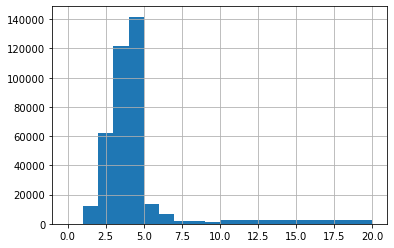

In [20]:
# Vamos a ver como se comporta el ancho acera

arboles_limpieza["ancho_acera"].dtype
#arboles_limpieza["ancho_acera"].astype(float)
arboles_limpieza["ancho_numerico"] = pd.to_numeric(arboles_limpieza["ancho_acera"], errors='coerce')
# Cuantos nuevos Nan hay?
arboles_limpieza["ancho_numerico"].isna().sum() - arboles_limpieza["ancho_acera"].isna().sum()
# Vamos a ver en un ratito como hacerlo mejor!

arboles_limpieza["ancho_numerico"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,20])
arboles_limpieza["ancho_numerico"].mean()
arboles_limpieza["ancho_numerico"].std()


# Vamos a aceptar tomar el valor medio

arboles_limpieza["ancho_numerico"].fillna(arboles_limpieza["ancho_numerico"].mean(), inplace = True)
arboles_limpieza.drop(["ancho_acera"], axis=1, inplace=True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

In [22]:
# Ahora vamos a reemplazar las columnas ubicacion plantera y nivel por valores representativos

display (arboles_limpieza["ubicacion_plantera"].value_counts())


# Notamos varias cosas, primero que regular es la abrumadora mayoria, segundo que se repiten categorias mal escritas. Tercero que entre Regular y Ochava son la gran mayoria, pero esto es informacion conceptual

# Veamos que pasa con la columna altura cuando ubicacion es ochava

arboles_limpieza["calle_chapa"][arboles_limpieza["ubicacion_plantera"]=="Ochava"].head(20)

# Contra lo que esperabamos no parace que corresponda siempre a fines o inicios de calle (numeros terminados en 00)


Regular                   340135
Ochava                     21858
Fuera de línea              5910
regular                      201
Regular                      198
Ocupada                       40
Fuera Nivel                   36
Cantero Grande                13
O                             12
ochava                        10
Ochava/Fuera Línea             3
Sobreocupada                   2
Och                            2
Elevada                        1
o                              1
Fuera Línea,Ochava             1
Fuera de Línea, Ochava         1
Ochva                          1
Fuera Línea/Ochava             1
Subocupada                     1
Name: ubicacion_plantera, dtype: int64

73     1405
180       5
189     598
287     396
367       5
580    1000
632    1111
638     815
653    1119
671     997
682     999
687     158
701       1
712       1
835    1409
840     222
843     222
848     897
867     807
934     373
Name: calle_chapa, dtype: object

In [25]:
# Vamos a reemplazar entonces con valores representativos de la muestra, que no es lo mismo que poner a todos "Regular"

index_nans = arboles_limpieza["ubicacion_plantera"].isna()


# Vamos entonces a reemplazar usando loc
reemplazos = arboles_limpieza["ubicacion_plantera"].dropna().sample(index_nans.sum())
arboles_limpieza["ubicacion_plantera"].loc[arboles_limpieza["ubicacion_plantera"].isna()] = reemplazos.to_list()
display(arboles_limpieza.head(10))


# Una opcion equivalente hubiera sido usar ffill o bfill porque si no hay un orden especial o si los Nans no vienen en bloque estadisticamente es lo mismo
arboles_limpieza["nivel_plantera"].fillna(method="ffill",inplace=True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')


C:\Anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,long,lat,nro_registro,tipo_activ,comuna,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,nombre_cientifico,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,ancho_numerico
0,-58.378563,-34.594902,26779,Lineal,1,Esmeralda,1000,1120,ESMERALDA 1120,Tipuana tipu,Ocupada,Regular,A nivel,88.0,34.0,5.500000
1,-58.381532,-34.592319,30887,Lineal,1,Pellegrini Carlos,1300,1345,"PELLEGRINI, CARLOS 1345",Peltophorum dubium,Ocupada,Regular,Elevada,6.0,5.0,4.500000
2,-58.379103,-34.591939,30904,Lineal,1,Arroyo,800,848,ARROYO 848,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,7.0,6.0,4.000000
3,-58.380710,-34.591548,31336,Lineal,1,Arroyo,900,932,ARROYO 932,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,9.0,29.0,3.785324
4,-58.380710,-34.591548,31337,Lineal,1,Arroyo,900,932,ARROYO 932,Jacaranda mimosifolia,Ocupada,Regular,A nivel,13.0,8.0,3.785324
5,-58.381043,-34.591584,31344,Lineal,1,Arroyo,900,970,ARROYO 970,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,29.0,15.0,3.500000
6,-58.380968,-34.591576,31346,Lineal,1,Arroyo,900,962,ARROYO 962,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,21.0,12.0,4.500000
7,-58.373356,-34.594871,31864,Lineal,1,Reconquista,1100,1126,RECONQUISTA 1126,Jacaranda mimosifolia,Ocupada,Regular,A nivel,8.0,3.0,3.785324
8,-58.380812,-34.591559,31354,Lineal,1,Arroyo,900,940,ARROYO 940,Jacaranda mimosifolia,Ocupada,Regular,A nivel,38.0,15.0,3.785324
9,-58.379839,-34.592821,32142,Lineal,1,Juncal,800,885,JUNCAL 885,Tilia x moltkei,Ocupada,Regular,A nivel,25.0,12.0,2.800000


long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             1.461867
calle_chapa              1.717140
direccion_normalizada    3.822867
nombre_cientifico        0.000000
estado_plantera          0.000000
ubicacion_plantera       0.000000
nivel_plantera           0.000000
diametro_altura_pecho    0.000000
altura_arbol             1.154675
ancho_numerico           0.000000
dtype: float64
entradas: 369801


In [31]:
(arboles_limpieza["calle_chapa"] == "0.0").sum()
(arboles_limpieza["calle_altura"] == "0.0").sum()

arboles_limpieza["calle_chapa"].replace("0.0", np.NaN, inplace=True)
arboles_limpieza["calle_altura"].replace("0.0", np.NaN, inplace=True)

In [32]:
# Ahora vamos a usar la opcion de usar una serie para reemplazar los nans en altura por chapa y viceversa. Si hay nans en los dos va a seguir siendo nan

arboles_limpieza["calle_altura"].fillna(arboles_limpieza["calle_chapa"],inplace=True)
arboles_limpieza["calle_chapa"].fillna(arboles_limpieza["calle_altura"],inplace=True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')

long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             0.505948
calle_chapa              0.505948
direccion_normalizada    3.822867
nombre_cientifico        0.000000
estado_plantera          0.000000
ubicacion_plantera       0.000000
nivel_plantera           0.000000
diametro_altura_pecho    0.000000
altura_arbol             1.154675
ancho_numerico           0.000000
dtype: float64
entradas: 369801


In [ ]:
# Vamos a proponernos resolver algunas cosas pendientes

# 1) Ver si podemos corregir las comas por puntos en la columna ancho acera
# 2) Ver si podemos encontrar alturas en la direccion normalizada
# 3) Ver si podemos encontrar calles en la columna direccion normalizada sin importar como esten escritas

In [35]:
print (pd.to_numeric(arboles["ancho_acera"], errors="coerce").isna().sum())

modificado = arboles["ancho_acera"].apply(lambda x: x.replace(",",".") if type(x)==str else x)

print (pd.to_numeric(modificado, errors="coerce").isna().sum())

3911
3139


In [43]:
arboles

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000,1120,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300,1345,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800,848,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900,932,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900,932,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370175,NaN,NaN,546140,Lineal,15,919,Guevara,1000,1000.0,NaN,LD3,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,34.0,7.0
370176,NaN,NaN,546141,Lineal,15,919,Guevara,1000,1000.0,NaN,LD4,Melia azedarach,3.3,Ocupada,Regular,A nivel,45.0,8.0
370177,NaN,NaN,546142,Lineal,15,919,Guevara,1000,1000.0,NaN,LD5,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,60.0,8.0
370178,NaN,NaN,546143,Lineal,15,919,Guevara,1000,1000.0,NaN,LD6,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0


In [45]:
import re

patron = "\d+"

regex = re.compile(patron, flags = re.IGNORECASE)

#direccion_rescatada = arboles_limpieza["direccion_normalizada"].replace(np.NaN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)

#display (direccion_rescatada)

arboles_limpieza["calle_altura"].fillna(direccion_rescatada,inplace=True)

#arboles_limpieza.drop(["direccion_normalizada"], axis=1, inplace=True)

print (arboles_limpieza.isna().sum()/arboles_limpieza.shape[0]*100)
print (f'entradas: {arboles_limpieza.shape[0]}')


long                     4.120865
lat                      4.120865
nro_registro             0.000000
tipo_activ               0.000000
comuna                   0.000000
calle_nombre             0.000000
calle_altura             0.503514
calle_chapa              0.505948
nombre_cientifico        0.000000
estado_plantera          0.000000
ubicacion_plantera       0.000000
nivel_plantera           0.000000
diametro_altura_pecho    0.000000
altura_arbol             1.154675
ancho_numerico           0.000000
dtype: float64
entradas: 369801


In [51]:
patron = "c"

regex = re.compile(patron, flags = re.IGNORECASE)

mascara = arboles_limpieza["calle_nombre"].apply(lambda x: True if regex.findall(x) else False)

arboles_limpieza[mascara]["calle_nombre"].unique()

array(['Pellegrini Carlos', 'Reconquista', 'Juncal', 'Cerrito',
       'Suipacha', 'Bouchard', 'Callao Av.', 'Córdoba Av.', 'Tucumán',
       'Castillo Ramón S. Pte. Av', 'Güemes Macacha ', 'Cevallos Virrey',
       'Calvo Carlos', 'Chacabuco', 'Talcahuano', 'Paseo Colón Av.',
       'Cabral Sargento', 'Cochabamba', 'Corrientes Av.',
       'Moreau  de Justo Alicia Av.', 'Sánchez de Thompson Mariquita',
       'Cossettini Olga', 'Pacini de Alvear Regina',
       'Zanni Pedro Comodoro', 'Ocampo Victoria', 'Independencia Av',
       'Chile', 'Roca Julio A. Pte. Av.', 'Lynch Marta',
       'Maizani Azucena', 'Carabelas', 'Tacuarí', 'San José de Calasanz',
       'Py Comodoro Av.', 'cerrito', 'Balcarce', 'Caseros Av.',
       'Fels Pablo T. Cabo', 'Villaflor Azucena', 'México',
       'Ezcurra Encarnación', 'Bullrich Intendente Av.',
       'Grierson Cecilia', 'Chile Av.', 'Del Carmen', 'Rocha',
       'Acosta Mariano', 'Echagüe Pedro', 'Constitución',
       'Cortejarena José A. ', 'Ancho

,long,lat,nro_registro,tipo_activ,comuna,calle_nombre,calle_altura,calle_chapa,nombre_cientifico,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,ancho_numerico,altura inferida
141293,-58.518722,-34.649115,234409,Lineal,9,García de Cossio,6700,6738,Fraxinus americana,Ocupada,Regular,Elevada,27.0,10.0,4.4,10.333333
207638,-58.478818,-34.604976,178709,Lineal,11,Carranza Adolfo P.,2400,2466,Ligustrum lucidum,Ocupada,Regular,A nivel,39.0,9.0,3.2,9.000000
26452,-58.396004,-34.619223,36538,Lineal,3,Rincón,800,875,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,27.0,10.0,2.4,9.029851
344843,-58.449285,-34.581468,265804,Lineal,15,Maure,3500.0,3516.0,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,29.0,11.0,4.0,9.368421
301213,-58.462556,-34.543022,544033,Lineal,13,Paroissien,1600,1650,Platanus x acerifolia,Ocupada,Regular,A nivel,90.0,19.0,4.4,22.600000
292808,-58.464500,-34.568505,122550,Lineal,13,Conde,1900,1970,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,55.0,15.0,3.3,10.750000
260847,-58.504379,-34.574261,160350,Lineal,12,Albarellos Av.,2400,2401,Platanus x acerifolia,Ocupada,Regular,A nivel,40.0,14.0,6.0,14.400000
40200,-58.396834,-34.637920,353084,Lineal,4,Uspallata,2500,2517,Fraxinus americana,Ocupada,Regular,A nivel,26.0,14.0,3.2,10.857143
287183,-58.453377,-34.576091,112566,Lineal,13,Conde,1000,1003,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,18.0,7.0,3.0,7.277778
83840,-58.443932,-34.611225,55975,Lineal,6,Arengreen,800,805,Fraxinus pennsylvanica,Ocupada,Regular,A nivel,27.0,13.0,3.0,9.029851


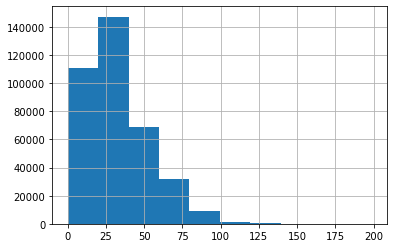

In [52]:
arboles_limpieza["diametro_altura_pecho"].hist()

def buscar_promedio(x): # Observar que usamos una variable externa lo cual no esta lindo, pero funciona.
    margen = muestra_arboles_limpieza["diametro_altura_pecho"].std()/10

    mascara = (muestra_arboles_limpieza["diametro_altura_pecho"].between(x["diametro_altura_pecho"] - margen, x["diametro_altura_pecho"] + margen)) & (muestra_arboles_limpieza["nombre_cientifico"] == x["nombre_cientifico"])
    if mascara.sum() > 0:
        return muestra_arboles_limpieza.loc[mascara,"altura_arbol"].mean()
    else:
        return np.NaN

muestra_arboles_limpieza = arboles_limpieza.sample(1000)    
muestra_arboles_limpieza["altura inferida"] = muestra_arboles_limpieza.apply(lambda x: buscar_promedio(x), axis=1)
muestra_arboles_limpieza.head(10)